In [2]:
import pandas as pd
import numpy as np
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
import pathlib
import pandasql as sqldf
import seaborn as sns
import matplotlib as mpl

import pyarrow
import pyspark
from pyspark.sql import *
from pyspark.context import SparkContext
# Import data visualization libraries
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#sns.set(style='ticks')

# Allow code cells to display multiple items in the output instead of the last item at the bottom of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Expand the number of rows and columns displayed in the notebook outputs
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 50)
pd.set_option('memory_usage',True)

con = sqlite3.connect(r"C:\Users\CDT - Admin\OneDrive - University of Virginia\Databases\Virginia_Court_Case_Database.db")
engine = create_engine('sqlite:///:memory:')
cur = con.cursor()

# This will let you query DataFrames with SQL syntax
pysqldf = lambda q: sqldf(q, globals())

In [3]:
test_df = pd.read_csv('https://github.com/bschoenfeld/virginia-court-data-analysis/blob/master/data/circuit_courts.csv')
test_df[0]

ParserError: Error tokenizing data. C error: Expected 1 fields in line 87, saw 2


In [2]:
spark = SparkSession.builder.appName('Dataframe').getOrCreate()
print(spark)

Exception: Java gateway process exited before sending its port number

In [19]:
#df1 = spark.sql("SELECT * FROM Circuit_Criminal")

#df1 = pyspark.sql.SQLContext.table("Circuit_Criminal")

#df1 = sqlContext.table("Circuit_Criminal")

NameError: name 'sqlContext' is not defined

In [20]:
df1 = pd.read_sql("""SELECT * FROM Circuit_Criminal where ChargeType is not null limit 10000""",con=con)
df1 = df1.drop(['TrafficFatality','Military'],axis=1)

df1['SentenceTimeYears'] = (df1['SentenceTime'] / 365)

In [21]:
df1.head(25)

HearingDate     HearingResult HearingJury HearingPlea                HearingType HearingRoom  fips       Filed                    Commencedby             Locality     Sex                            Race                  Address                          Charge     CodeSection   ChargeType Class OffenseDate  ArrestDate       DispositionCode DispositionDate                 ConcludedBy   AmendedCharge AmendedCodeSection AmendedChargeType JailPenitentiary ConcurrentConsecutive LifeDeath  SentenceTime  SentenceSuspended  OperatorLicenseSuspensionTime  FineAmount  Costs FinesCostPaid ProgramType ProbationType  ProbationTime ProbationStarts CourtDMVSurrender DriverImprovementClinic DrivingRestrictions RestrictionEffectiveDate RestrictionEndDate VAAlcoholSafetyAction RestitutionPaid  RestitutionAmount AppealedDate        person_id  SentenceTimeYears
0   2000-12-19         Dismissed        None        None           Under Advisement        None    91  2000-02-16  General District Court Appeal   COMMONWEALTH OF VA    Male  White Caucasian (Non-Hispanic)    BLUE GRASS, VA  24413   ELUDE LAW ENFORCEMENT OFFICER        46.2-817  Misdemeanor  None  1999-11-19        None             Dismissed      2000-12-19                   Dismissal            None               None              None             None                  None      None           NaN                NaN                            NaN         NaN    NaN          None        None          None            NaN            None              None                    None                None                     None               None                  None            None                NaN         None  227220000000470                NaN
1   2000-09-19         Dismissed        None        None                      Trial        None    91  2000-05-19                    J&Dr Appeal   COMMONWEALTH OF VA    Male  White Caucasian (Non-Hispanic)      STAUNTON, VA  24401              OBSCENE PHONE CALL        18.2-427  Misdemeanor     1  2000-03-10        None  Not Guilty/Acquitted      2000-09-19                   Dismissal            None               None              None             None                  None      None           NaN                NaN                            NaN         NaN    NaN          None        None          None            NaN            None              None                    None                None                     None               None                  None            None                NaN         None  352110000000071                NaN
2   2000-09-07              Sent        None        None                      Trial        None    91  2000-02-16  General District Court Appeal   COMMONWEALTH OF VA    Male  White Caucasian (Non-Hispanic)    BLUE GRASS, VA  24413               SHOOT FROM A ROAD        18.2-286  Misdemeanor  None  1999-11-19        None                Guilty      2000-09-07                 Guilty Plea            None               None              None             None                  None      None           NaN                NaN                            NaN       300.0   81.0             t        None          None            NaN            None              None                    None                None                     None               None                  None            None                NaN         None  216180000001276                NaN
3   2000-09-07    Nolle Prosequi        None        None                      Trial        None    91  2000-02-16  General District Court Appeal   COMMONWEALTH OF VA    Male  White Caucasian (Non-Hispanic)    BLUE GRASS, VA  24413            SHOOT FROM A VEHICLE     29.1-521(6)  Misdemeanor  None  1999-11-19        None        Nolle Prosequi      2000-09-07              Nolle Prosequi            None               None              None             None                  None      None           NaN                NaN                            NaN         NaN    NaN       

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HearingDate                    10000 non-null  object 
 1   HearingResult                  9828 non-null   object 
 2   HearingJury                    107 non-null    object 
 3   HearingPlea                    2341 non-null   object 
 4   HearingType                    10000 non-null  object 
 5   HearingRoom                    4048 non-null   object 
 6   fips                           10000 non-null  int64  
 7   Filed                          10000 non-null  object 
 8   Commencedby                    10000 non-null  object 
 9   Locality                       10000 non-null  object 
 10  Sex                            10000 non-null  object 
 11  Race                           9971 non-null   object 
 12  Address                        9060 non-null   

<AxesSubplot:>

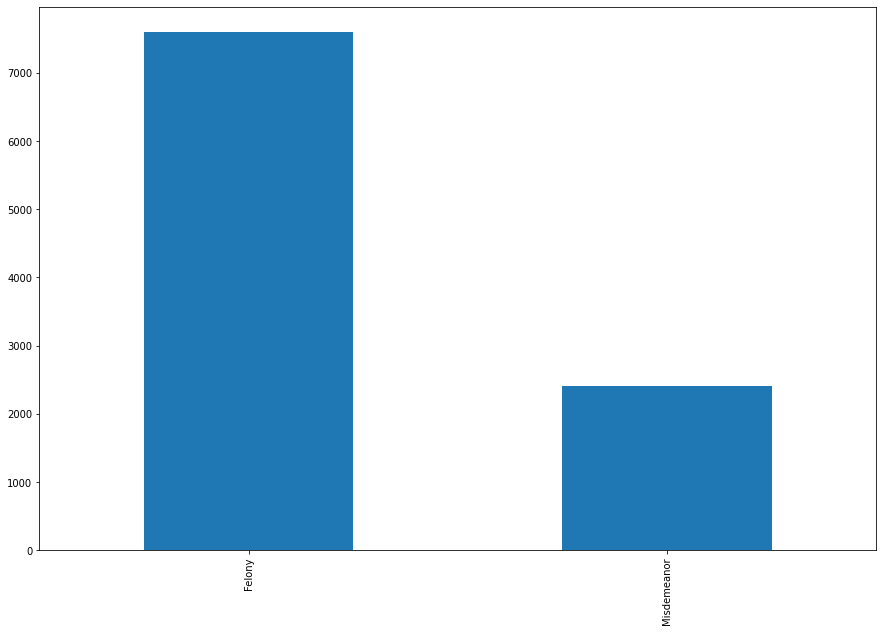

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

df1['ChargeType'].value_counts().plot(kind='bar',ax=ax)

In [24]:
df1['ChargeType'].value_counts()


Felony         7592
Misdemeanor    2408
Name: ChargeType, dtype: int64

In [25]:
df1['HearingResult'].value_counts()


Sent                                  4499
Nolle Prosequi                        1436
Dismissed                             1185
Revoked - Sentence/Probation           983
Resolved                               823
Judgment Entered (Fines & Costs)       294
Appeal Withdrawn                       171
Tried                                  113
Granted                                 73
Withdrawn                               43
No Indictment Presented                 41
Denied                                  36
Bench Warrant Issued                    24
Mistrial                                20
Not True Bill                           12
Continued Generally                     10
Transferred                             10
Under Advisement                         9
Continued                                8
Remanded                                 8
Capias Withdrawn                         8
Disposed Of In Advanced                  6
Capias Issued                            5
Capias-Defe

<AxesSubplot:>

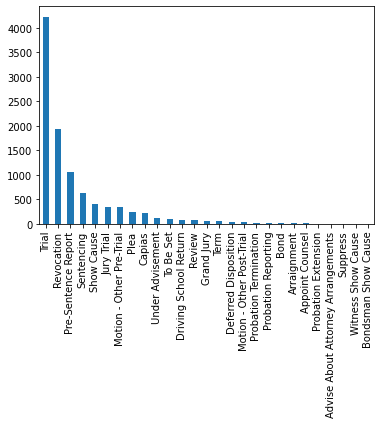

In [26]:
df1['HearingType'].value_counts().plot(kind='bar')

<AxesSubplot:>

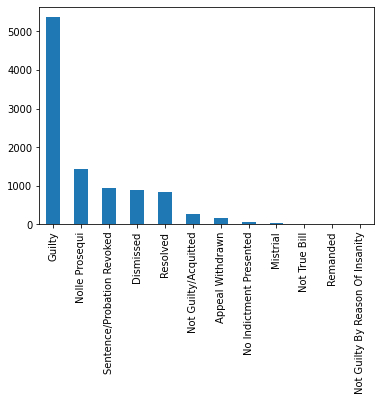

In [27]:
df1['DispositionCode'].value_counts().plot(kind='bar')


In [28]:
cht = alt.Chart(df1.iloc[0:4999]).mark_bar().encode(
    x=alt.X('DispositionCode',type='quantitative')
)

cht

alt.Chart(...)